In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, recall_score, precision_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploratory Data Analysis

In [2]:
profitable = pd.read_csv('profitable.csv')

In [3]:
profitable.head()

,Industry type,Total liabilities vs Total Assets,Working Capital vs total assets,Current Assets vs short-term liabilities,Distance from airport,Retained earning vs total assets,Employee strength,MNC or not,Sales vs total assets,Equity vs total assets,Location,Distances from water source,powered by green energy,gf and interest vs total assets,total liabilities vs gross profit and depriciation,class
0,software,0.37951,0.39641,2.0472,0,0.38825,0,0,1.1389,0.50494,0,0,1.0,0.249760,497.42,0
1,textile,0.49988,0.47225,1.9447,0,0.00000,1,0,1.6996,0.49788,0,0,1.0,0.258340,677.96,0
2,hardware,0.69592,0.26713,1.5548,0,0.00000,0,0,1.3090,0.30408,0,0,1.0,0.309060,794.16,0
3,software,0.30734,0.45879,2.4928,0,0.14988,0,0,1.0571,0.57353,0,0,1.0,0.092704,917.01,0
4,software,0.61323,0.22960,1.4063,1,0.18732,0,0,1.1559,0.38677,0,1,1.0,0.187320,1133.20,1


In [4]:
profitable.shape

(43261, 16)

In [5]:
profitable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43261 entries, 0 to 43260
Data columns (total 16 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Industry type                                       43261 non-null  object 
 1   Total liabilities vs Total Assets                   43254 non-null  float64
 2   Working Capital vs total assets                     43254 non-null  float64
 3   Current Assets vs short-term liabilities            43128 non-null  float64
 4   Distance from airport                               43261 non-null  int64  
 5   Retained earning vs total assets                    43249 non-null  float64
 6   Employee strength                                   43261 non-null  int64  
 7   MNC or not                                          43261 non-null  int64  
 8   Sales vs total assets                               43252 non-null  float64


In [6]:
profitable.nunique()

Industry type                                             3
Total liabilities vs Total Assets                     34656
Working Capital vs total assets                       36586
Current Assets vs short-term liabilities              30070
Distance from airport                                     2
Retained earning vs total assets                      23469
Employee strength                                         2
MNC or not                                                2
Sales vs total assets                                 24274
Equity vs total assets                                34706
Location                                                  2
Distances from water source                               2
powered by green energy                                   2
gf and interest vs total assets                       36976
total liabilities vs gross profit and depriciation    37400
class                                                     2
dtype: int64

__Observations__
* From above we can observe that Industry type is categorical but identified as object
* Distance from airport,Employee strength, MNC or not,Location,Distances from water source,poweredby green energy,class should be categorical intsead of int64


### Data Pre-processing

* __Data type conversion__

    Using astype('category') to convert Industry type,Distance from airport,Employee strength, MNC or not,Location,Distances from water source,poweredby green energy,class attributes to categorical attributes.

In [7]:
profitable.columns

Index(['Industry type', 'Total liabilities vs Total Assets',
       'Working Capital vs total assets',
       'Current Assets vs short-term liabilities', 'Distance from airport',
       'Retained earning vs total assets', 'Employee strength', 'MNC or not',
       'Sales vs total assets', 'Equity vs total assets', 'Location',
       'Distances from water source', 'powered by green energy',
       'gf and interest vs total assets',
       'total liabilities vs gross profit and depriciation', 'class'],
      dtype='object')

In [8]:
for col in ['Industry type', 'Distance from airport',
        'Employee strength', 'MNC or not', 'Location',
       'Distances from water source', 'powered by green energy', 'class']:
    profitable[col] = profitable[col].astype('category')

In [9]:
print(profitable.dtypes)

Industry type                                         category
Total liabilities vs Total Assets                      float64
Working Capital vs total assets                        float64
Current Assets vs short-term liabilities               float64
Distance from airport                                 category
Retained earning vs total assets                       float64
Employee strength                                     category
MNC or not                                            category
Sales vs total assets                                  float64
Equity vs total assets                                 float64
Location                                              category
Distances from water source                           category
powered by green energy                               category
gf and interest vs total assets                        float64
total liabilities vs gross profit and depriciation     float64
class                                                 c

In [10]:
profitable.describe(include = 'all')

,Industry type,Total liabilities vs Total Assets,Working Capital vs total assets,Current Assets vs short-term liabilities,Distance from airport,Retained earning vs total assets,Employee strength,MNC or not,Sales vs total assets,Equity vs total assets,Location,Distances from water source,powered by green energy,gf and interest vs total assets,total liabilities vs gross profit and depriciation,class
count,43261,43254.000000,43254.000000,43128.000000,43261.0,43249.000000,43261.0,43261.0,43252.000000,43254.000000,43261.0,43261.0,41188.0,43255.000000,4.322500e+04,43261.0
unique,3,NaN,NaN,NaN,2.0,NaN,2.0,2.0,NaN,NaN,2.0,2.0,2.0,NaN,NaN,2.0
top,textile,NaN,NaN,NaN,0.0,NaN,0.0,1.0,NaN,NaN,1.0,0.0,1.0,NaN,NaN,0.0
freq,18014,NaN,NaN,NaN,22923.0,NaN,25247.0,27269.0,NaN,NaN,22060.0,25666.0,29620.0,NaN,NaN,30753.0
mean,NaN,0.588990,0.115565,6.328697,NaN,-0.054159,NaN,NaN,2.652729,0.628860,NaN,NaN,NaN,0.094182,1.944858e+03,NaN
std,NaN,5.851898,5.447879,295.923572,NaN,7.212964,NaN,NaN,63.037266,14.694602,NaN,NaN,NaN,5.722254,9.632029e+04,NaN
min,NaN,-430.870000,-479.960000,-0.403110,NaN,-508.410000,NaN,NaN,-1.215700,-479.910000,NaN,NaN,NaN,-517.480000,-9.632400e+06,NaN
25%,NaN,0.268665,0.021886,1.050700,NaN,0.000000,NaN,NaN,1.018400,0.296130,NaN,NaN,NaN,0.005958,2.247700e+02,NaN
50%,NaN,0.471530,0.196855,1.571500,NaN,0.000000,NaN,NaN,1.194350,0.506190,NaN,NaN,NaN,0.059772,8.476100e+02,NaN
75%,NaN,0.687700,0.403543,2.790025,NaN,0.091306,NaN,NaN,2.059900,0.709448,NaN,NaN,NaN,0.151065,2.228700e+03,NaN


* __Missing value treatment__

In [11]:
profitable.isnull().sum()

Industry type                                            0
Total liabilities vs Total Assets                        7
Working Capital vs total assets                          7
Current Assets vs short-term liabilities               133
Distance from airport                                    0
Retained earning vs total assets                        12
Employee strength                                        0
MNC or not                                               0
Sales vs total assets                                    9
Equity vs total assets                                   7
Location                                                 0
Distances from water source                              0
powered by green energy                               2073
gf and interest vs total assets                          6
total liabilities vs gross profit and depriciation      36
class                                                    0
dtype: int64

In [12]:
# differentiating columns with missing values
null_columns = [features for features in profitable.columns if profitable[features].isnull().sum()>0]
null_columns

['Total liabilities vs Total Assets',
 'Working Capital vs total assets',
 'Current Assets vs short-term liabilities',
 'Retained earning vs total assets',
 'Sales vs total assets',
 'Equity vs total assets',
 'powered by green energy',
 'gf and interest vs total assets',
 'total liabilities vs gross profit and depriciation']

In [13]:
#percentage of missing values in each columns
for k in null_columns:
    print(k,":",round(profitable[k].isnull().sum()/len(profitable)*100,2))

Total liabilities vs Total Assets : 0.02
Working Capital vs total assets : 0.02
Current Assets vs short-term liabilities : 0.31
Retained earning vs total assets : 0.03
Sales vs total assets : 0.02
Equity vs total assets : 0.02
powered by green energy : 4.79
gf and interest vs total assets : 0.01
total liabilities vs gross profit and depriciation : 0.08


In [14]:
# Replacing missing values of 'powered by green energy' using mode
num = profitable['powered by green energy'].mode()[0]
profitable['powered by green energy'].fillna(num, inplace=True)

In [15]:
profitable.isnull().sum()

Industry type                                           0
Total liabilities vs Total Assets                       7
Working Capital vs total assets                         7
Current Assets vs short-term liabilities              133
Distance from airport                                   0
Retained earning vs total assets                       12
Employee strength                                       0
MNC or not                                              0
Sales vs total assets                                   9
Equity vs total assets                                  7
Location                                                0
Distances from water source                             0
powered by green energy                                 0
gf and interest vs total assets                         6
total liabilities vs gross profit and depriciation     36
class                                                   0
dtype: int64

In [16]:
#dropping columns having missing value < 5%
profitable = profitable.dropna(axis = 0)

In [17]:
print(profitable.isnull().sum())
print(profitable.shape)

Industry type                                         0
Total liabilities vs Total Assets                     0
Working Capital vs total assets                       0
Current Assets vs short-term liabilities              0
Distance from airport                                 0
Retained earning vs total assets                      0
Employee strength                                     0
MNC or not                                            0
Sales vs total assets                                 0
Equity vs total assets                                0
Location                                              0
Distances from water source                           0
powered by green energy                               0
gf and interest vs total assets                       0
total liabilities vs gross profit and depriciation    0
class                                                 0
dtype: int64
(43114, 16)


* __Data Visualization__
     
     __Univariate analysis__ : To scrutinize univariate distribution of each feature we need to seggregate the numerical and categorical columns first

In [18]:
num_cols = profitable.select_dtypes(include=['int64','float64','Int64']).columns

In [19]:
cat_cols = profitable.select_dtypes(include=['category']).columns
cat_cols = cat_cols.drop('class')

In [20]:
print(num_cols)
print(cat_cols)

Index(['Total liabilities vs Total Assets', 'Working Capital vs total assets',
       'Current Assets vs short-term liabilities',
       'Retained earning vs total assets', 'Sales vs total assets',
       'Equity vs total assets', 'gf and interest vs total assets',
       'total liabilities vs gross profit and depriciation'],
      dtype='object')
Index(['Industry type', 'Distance from airport', 'Employee strength',
       'MNC or not', 'Location', 'Distances from water source',
       'powered by green energy'],
      dtype='object')


In [21]:
# visualize nueric columns
def PlothistCharts(inpData, colsToPlot):
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle(f"Dist. of continuous Data before treatment")
    fig.subplots_adjust(hspace = 0.5,wspace=0.5)

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='hist',ax=subPlot[plotNumber]).set(ylabel=None)

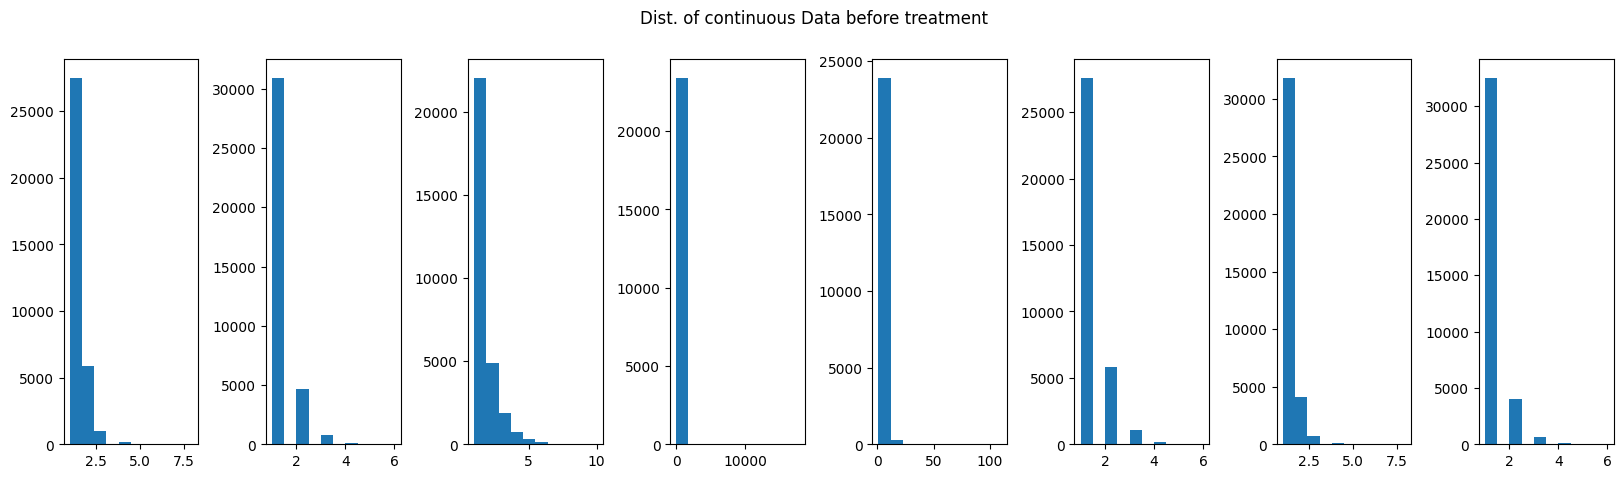

In [22]:
PlothistCharts(inpData=profitable, colsToPlot=num_cols)

__Observations__
   
   * From above histogram charts it is clear that all of the columns are mostly skewed and need to be checked if the skewness is due to outliers or not.

In [23]:
profitable.skew()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10212\3252358035.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  profitable.skew()


Total liabilities vs Total Assets                      57.091629
Working Capital vs total assets                       -81.852586
Current Assets vs short-term liabilities              155.299981
Retained earning vs total assets                      -31.108471
Sales vs total assets                                 196.720049
Equity vs total assets                                -66.169014
gf and interest vs total assets                        46.295876
total liabilities vs gross profit and depriciation     15.918188
dtype: float64

* Above is the amount of skewness every numeric column contains and all of them are high.

In [24]:
#visualizing category columns
def PlotBarCharts(inpData, colsToPlot):
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of categorical cols')
    fig.subplots_adjust(hspace = 0.5,wspace=0.5)

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

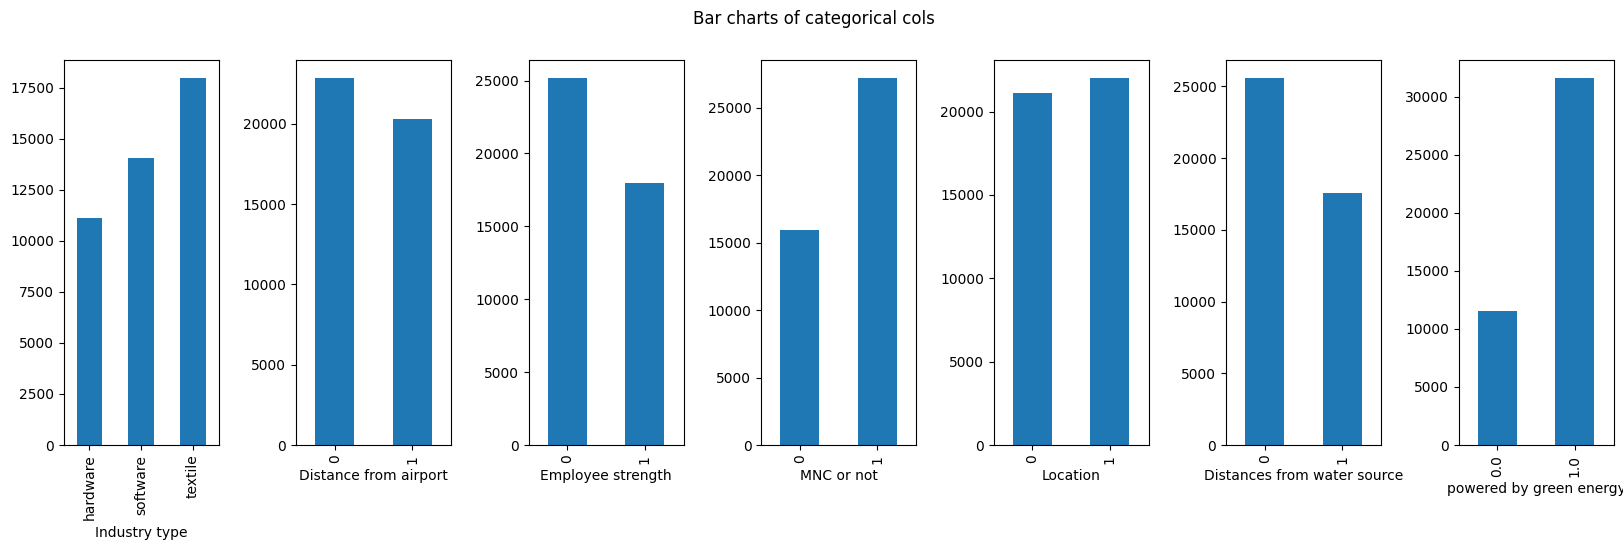

In [25]:
PlotBarCharts(inpData=profitable, colsToPlot=cat_cols)

__Observations__

   * From above bar charts it can be inferred that categorical features are mostly imbalanced in their classes. Final selection will be done after bivariate analysis.

* __Outlier Treatment__

  Outliers are treated using standard normalization i.e. conversion the data points of numeric columns into their respective z-score value and then eliminating values more than 3 or less than -3.

In [26]:
for col in num_cols:
    col_z_score = col + '_z_score'
    profitable[col_z_score] = (profitable[col]-profitable[col].mean())/profitable[col].std(ddof=0)

In [27]:
print(num_cols)

Index(['Total liabilities vs Total Assets', 'Working Capital vs total assets',
       'Current Assets vs short-term liabilities',
       'Retained earning vs total assets', 'Sales vs total assets',
       'Equity vs total assets', 'gf and interest vs total assets',
       'total liabilities vs gross profit and depriciation'],
      dtype='object')


<AxesSubplot: >

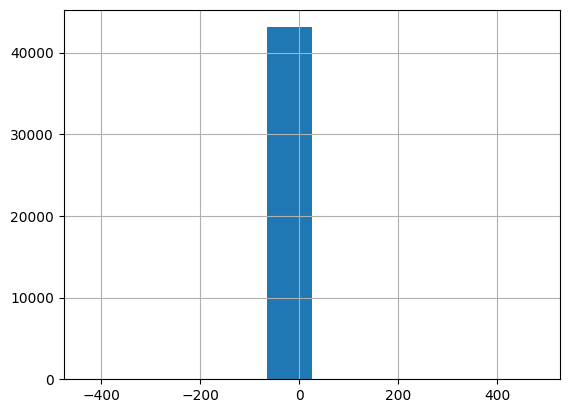

In [28]:
profitable['Total liabilities vs Total Assets'].hist()

In [29]:
profitable['Total liabilities vs Total Assets'][profitable['Total liabilities vs Total Assets_z_score']<-3].sort_values(ascending=False)

41846   -430.87
Name: Total liabilities vs Total Assets, dtype: float64

In [30]:
profitable['Total liabilities vs Total Assets'].median()

0.47224

In [31]:
profitable['Total liabilities vs Total Assets'][profitable['Total liabilities vs Total Assets_z_score']>3] = profitable['Total liabilities vs Total Assets'].median()
profitable['Total liabilities vs Total Assets'][profitable['Total liabilities vs Total Assets_z_score']<-3] = 0

C:\Users\DELL\AppData\Local\Temp\ipykernel_10212\3112636582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable['Total liabilities vs Total Assets'][profitable['Total liabilities vs Total Assets_z_score']<-3] = 0


<AxesSubplot: >

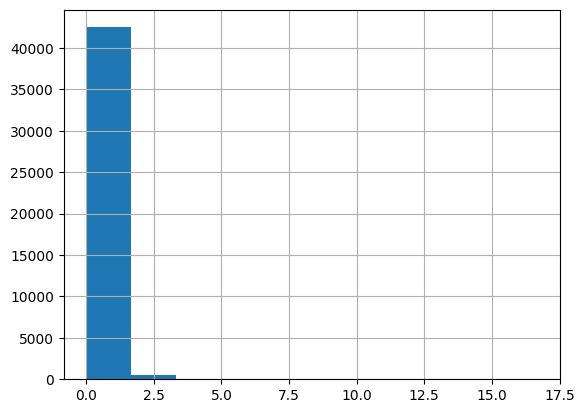

In [32]:
profitable['Total liabilities vs Total Assets'].hist()

<AxesSubplot: >

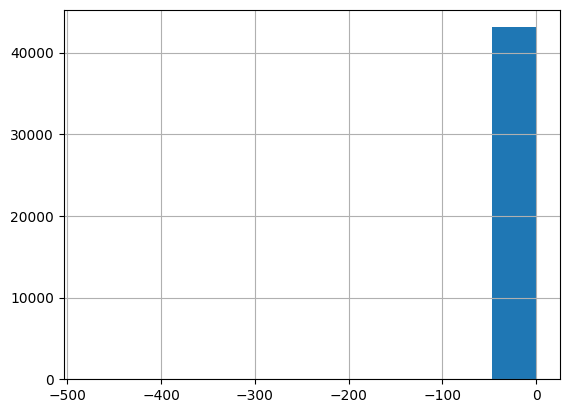

In [33]:
profitable['Working Capital vs total assets'].hist()

In [34]:
profitable['Working Capital vs total assets'][profitable['Working Capital vs total assets_z_score']<-3].sort_values(ascending=False)

32704    -19.403
3466     -21.234
18697    -23.905
29095    -24.431
39167    -24.662
8483     -45.905
15269    -53.233
43082    -72.067
12350   -109.690
6921    -440.500
11259   -440.740
27521   -445.880
31750   -445.910
21549   -479.730
17051   -479.960
Name: Working Capital vs total assets, dtype: float64

In [35]:
profitable['Working Capital vs total assets'].median()

0.196355

In [36]:
profitable['Working Capital vs total assets'][profitable['Working Capital vs total assets_z_score']<-3] = profitable['Working Capital vs total assets'].median()

<AxesSubplot: >

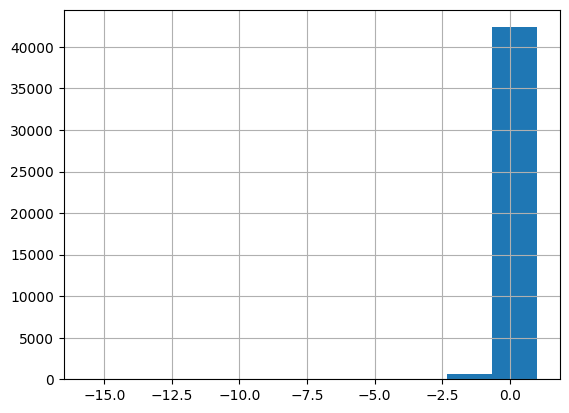

In [37]:
profitable['Working Capital vs total assets'].hist()

<AxesSubplot: >

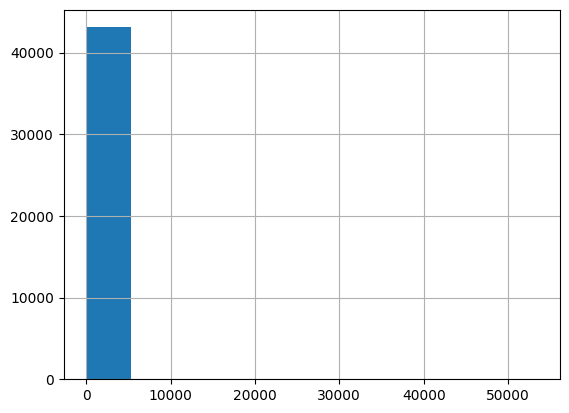

In [38]:
profitable['Current Assets vs short-term liabilities'].hist()

In [39]:
profitable['Current Assets vs short-term liabilities'][profitable['Current Assets vs short-term liabilities_z_score']>3].sort_values(ascending=False)

21370    53433.00
31587    27146.00
33847     8199.10
42448     6845.80
13445     4881.60
33602     3848.30
23535     3171.70
19811     1812.10
32490     1159.60
1026      1017.80
23272      991.19
18688      929.04
27486      916.50
Name: Current Assets vs short-term liabilities, dtype: float64

In [40]:
profitable['Current Assets vs short-term liabilities'].median()

1.5714

In [41]:
profitable['Current Assets vs short-term liabilities'][profitable['Current Assets vs short-term liabilities_z_score']>3] = profitable['Current Assets vs short-term liabilities'].median()

<AxesSubplot: >

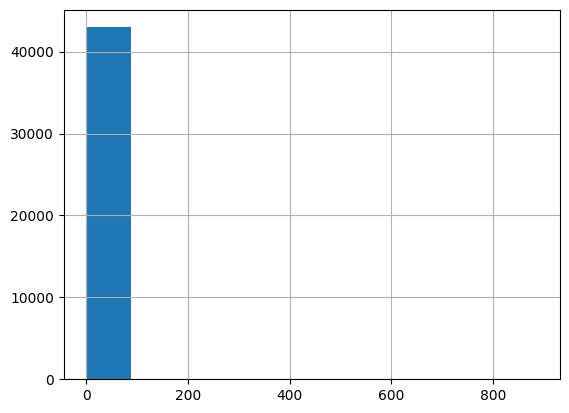

In [42]:
profitable['Current Assets vs short-term liabilities'].hist()

<AxesSubplot: >

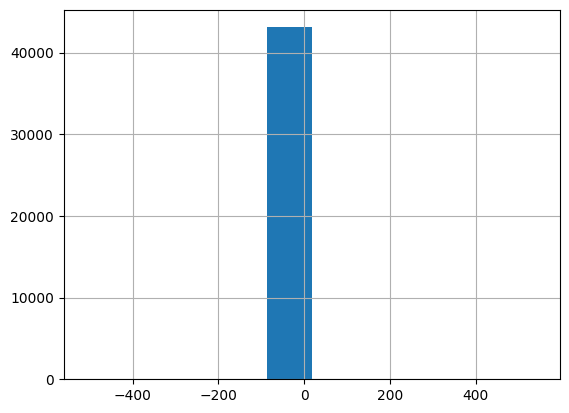

In [43]:
profitable['Retained earning vs total assets'].hist()

In [44]:
profitable['Retained earning vs total assets'][profitable['Retained earning vs total assets_z_score']<-3].sort_values(ascending=False)

32992    -21.330
24657    -22.976
25596    -23.346
18697    -23.794
30720    -25.252
29095    -27.380
40643    -27.984
5432     -29.451
43082    -32.052
39167    -34.052
30015    -34.675
3740     -37.292
36052    -39.803
18521    -43.019
16818    -45.766
10952    -45.766
37290    -46.873
12350    -48.055
8483     -48.566
35479    -53.802
43230    -54.464
40916    -69.020
22880    -70.966
32993    -77.399
15269    -90.817
42742   -100.380
36668   -117.420
6921    -397.890
11259   -398.120
27521   -486.720
31750   -486.820
21549   -508.120
17051   -508.410
Name: Retained earning vs total assets, dtype: float64

In [45]:
profitable['Retained earning vs total assets'][profitable['Retained earning vs total assets_z_score']<-3] = profitable['Retained earning vs total assets'].median()
profitable['Retained earning vs total assets'][profitable['Retained earning vs total assets_z_score']>3] =  profitable['Retained earning vs total assets'].median()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10212\1259345230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable['Retained earning vs total assets'][profitable['Retained earning vs total assets_z_score']>3] =  profitable['Retained earning vs total assets'].median()


<AxesSubplot: >

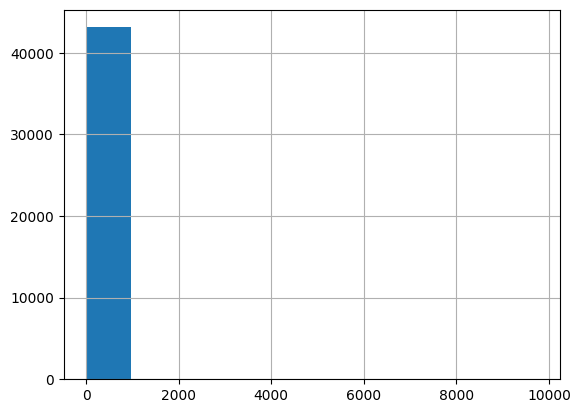

In [46]:
profitable['Sales vs total assets'].hist()

In [47]:
profitable['Sales vs total assets'][profitable['Sales vs total assets_z_score']>3].sort_values(ascending=False)

12873    9742.30
30160    1704.80
22479     740.44
32626     359.94
15269     284.74
12350     215.64
18699     169.50
Name: Sales vs total assets, dtype: float64

In [48]:
profitable['Sales vs total assets'][profitable['Sales vs total assets_z_score']>3] = profitable['Sales vs total assets'].median()

<AxesSubplot: >

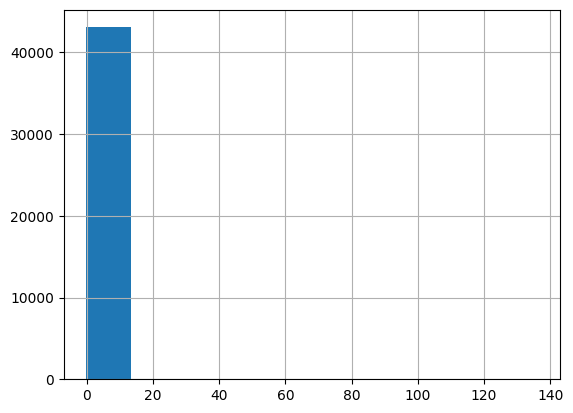

In [49]:
profitable['Sales vs total assets'].hist()

<AxesSubplot: >

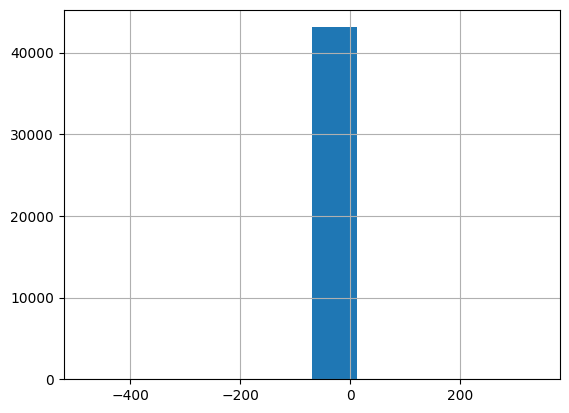

In [50]:
profitable['Equity vs total assets'].hist()

In [51]:
profitable['Equity vs total assets'][profitable['Equity vs total assets_z_score']<-3].sort_values(ascending=False)

41341    -18.085
32704    -19.403
3466     -20.340
18697    -23.905
30720    -24.005
29095    -24.431
39167    -24.640
37290    -39.156
43230    -45.027
8483     -45.905
15269    -53.233
43082    -71.444
12350   -109.690
6921    -440.550
11259   -440.740
27521   -445.860
31750   -445.910
21549   -479.730
17051   -479.910
Name: Equity vs total assets, dtype: float64

In [52]:
profitable['Equity vs total assets'][profitable['Equity vs total assets_z_score']<-3] = profitable['Equity vs total assets'].median()
profitable['Equity vs total assets'][profitable['Equity vs total assets_z_score']>3] = profitable['Equity vs total assets'].median()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10212\1395828647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable['Equity vs total assets'][profitable['Equity vs total assets_z_score']>3] = profitable['Equity vs total assets'].median()


<AxesSubplot: >

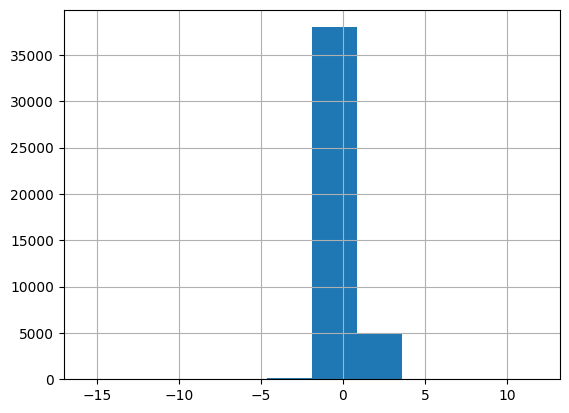

In [53]:
profitable['Equity vs total assets'].hist()

<AxesSubplot: >

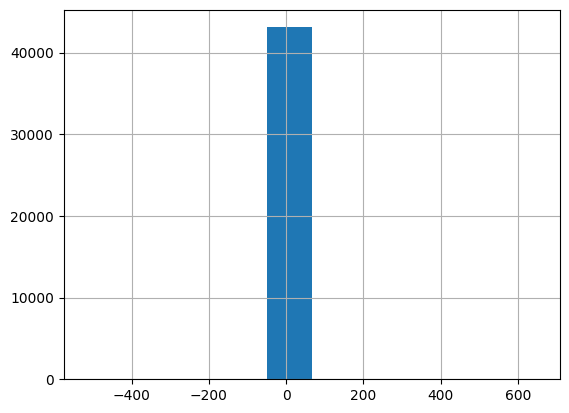

In [54]:
profitable['gf and interest vs total assets'].hist()

In [55]:
profitable['gf and interest vs total assets'][profitable['gf and interest vs total assets_z_score']<-3].sort_values(ascending=False)

34296    -12.458
18699    -17.692
43082    -32.090
6921     -61.602
11259    -61.628
12350    -75.331
41846   -517.480
Name: gf and interest vs total assets, dtype: float64

In [56]:
profitable['gf and interest vs total assets'][profitable['gf and interest vs total assets_z_score']>3] = profitable['gf and interest vs total assets'].median()
profitable['gf and interest vs total assets'][profitable['gf and interest vs total assets_z_score']<-3] = profitable['gf and interest vs total assets'].median()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10212\197639504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable['gf and interest vs total assets'][profitable['gf and interest vs total assets_z_score']<-3] = profitable['gf and interest vs total assets'].median()


<AxesSubplot: >

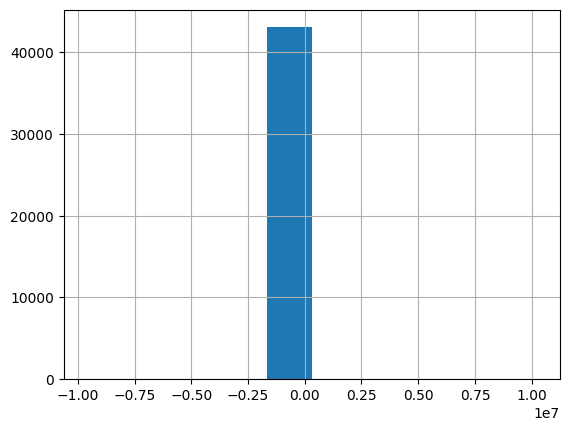

In [57]:
profitable['total liabilities vs gross profit and depriciation'].hist()

In [58]:
profitable['total liabilities vs gross profit and depriciation'][profitable['total liabilities vs gross profit and depriciation_z_score']<-3].sort_values(ascending=False)

8188     -293190.0
30895    -301630.0
6177     -307910.0
27782    -316410.0
23877    -329010.0
7120     -335980.0
14628    -352950.0
12966    -365870.0
11892    -378280.0
32293    -378620.0
13458    -392920.0
23285    -393800.0
8041     -402480.0
30073    -455540.0
35341    -465260.0
38055    -466770.0
21806    -467640.0
16424    -503550.0
37353    -503650.0
12737    -562670.0
31109    -588320.0
35814    -594510.0
27476    -602360.0
3426     -614740.0
5938     -653260.0
33678    -674010.0
29611    -683360.0
20009    -697480.0
29604    -702610.0
33136    -740260.0
34707    -789840.0
8694     -812720.0
20625    -899690.0
12559    -921580.0
12188    -950190.0
15937    -960810.0
15243   -1019200.0
20973   -1204100.0
31502   -1232400.0
12973   -1243300.0
35291   -1567500.0
9172    -2114500.0
11768   -2132900.0
18145   -2321800.0
678     -5611900.0
39533   -9632400.0
Name: total liabilities vs gross profit and depriciation, dtype: float64

In [59]:
profitable['total liabilities vs gross profit and depriciation'][profitable['total liabilities vs gross profit and depriciation_z_score']<-3] = profitable['total liabilities vs gross profit and depriciation'].median()
profitable['total liabilities vs gross profit and depriciation'][profitable['total liabilities vs gross profit and depriciation_z_score']>3] = profitable['total liabilities vs gross profit and depriciation'].median()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10212\1945182805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable['total liabilities vs gross profit and depriciation'][profitable['total liabilities vs gross profit and depriciation_z_score']>3] = profitable['total liabilities vs gross profit and depriciation'].median()


In [60]:
def PlothistCharts(inpData, colsToPlot):
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle(f"Dist. of continuous Data After treatment")
    fig.subplots_adjust(hspace = 0.5,wspace=0.5)

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='hist',ax=subPlot[plotNumber]).set(ylabel=None)

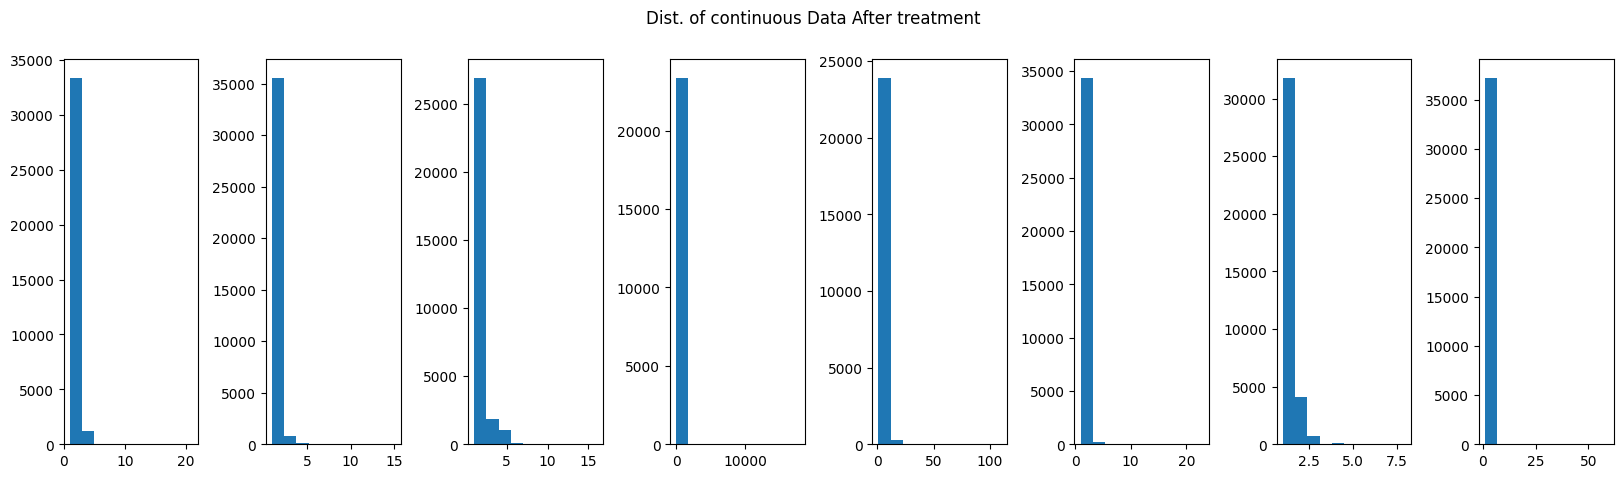

In [61]:
PlothistCharts(inpData=profitable, colsToPlot=num_cols)

In [62]:
# Deleting z-score columns as no longer needed
profitable.drop(['Total liabilities vs Total Assets_z_score',
       'Working Capital vs total assets_z_score',
       'Current Assets vs short-term liabilities_z_score',
       'Retained earning vs total assets_z_score',
       'Sales vs total assets_z_score', 'Equity vs total assets_z_score',
       'gf and interest vs total assets_z_score',
       'total liabilities vs gross profit and depriciation_z_score'],axis=1,inplace=True)

__Bi-Variate analysis__

  * To get an overview of how all predictors are behaving with respect to target column so that feature selection can be done

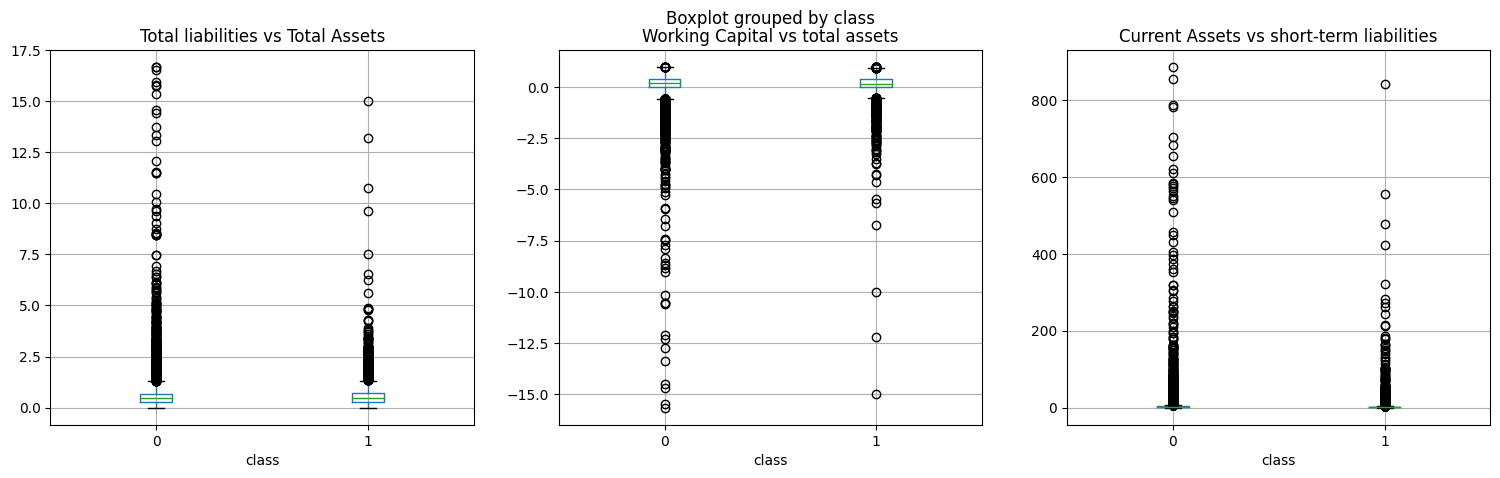

In [63]:
# Box plots for Categorical Target Variable "class" and continuous predictors
ContinuousColsList1 = ['Total liabilities vs Total Assets', 'Working Capital vs total assets',
       'Current Assets vs short-term liabilities']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList1), figsize=(18,5))
fig.subplots_adjust(hspace = 0.6,wspace=0.9)

# Creating box plots for each continuous predictor against the Target Variable "class"
for PredictorCol , i in zip(ContinuousColsList1, range(len(ContinuousColsList1))):
    profitable.boxplot(column=PredictorCol, by='class', figsize=(5,5), vert=True, ax=PlotCanvas[i])

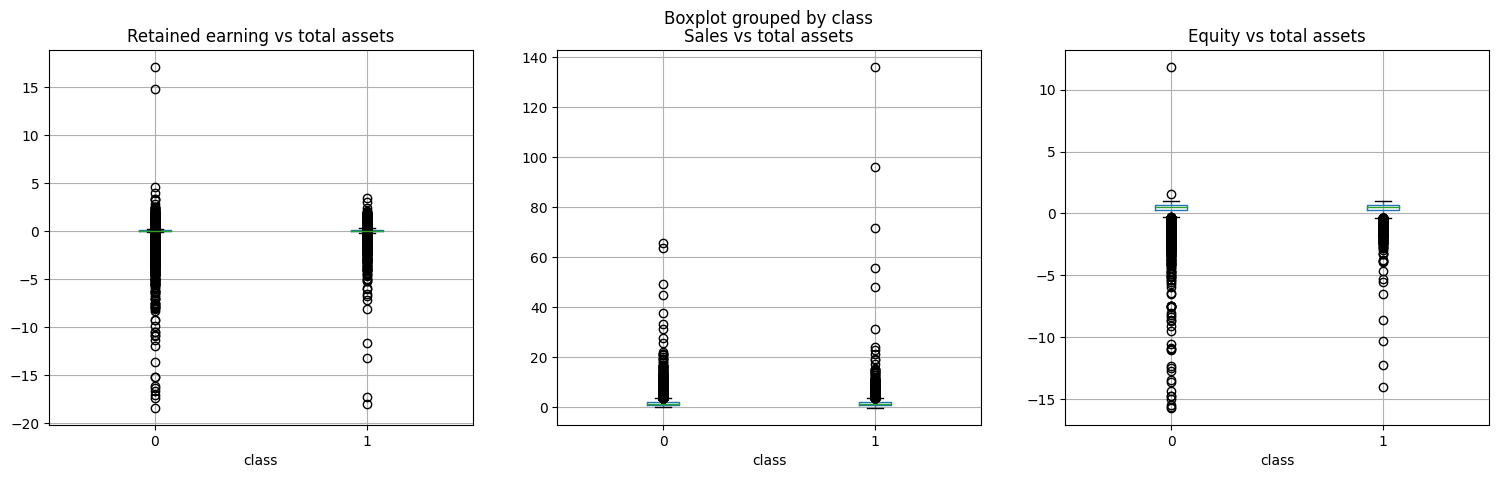

In [64]:
ContinuousColsList2 = ['Retained earning vs total assets', 'Sales vs total assets',
       'Equity vs total assets']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList2), figsize=(18,5))
fig.subplots_adjust(hspace = 0.6,wspace=0.9)

# Creating box plots for each continuous predictor against the Target Variable "class"
for PredictorCol , i in zip(ContinuousColsList2, range(len(ContinuousColsList2))):
    profitable.boxplot(column=PredictorCol, by='class', figsize=(5,5), vert=True, ax=PlotCanvas[i])

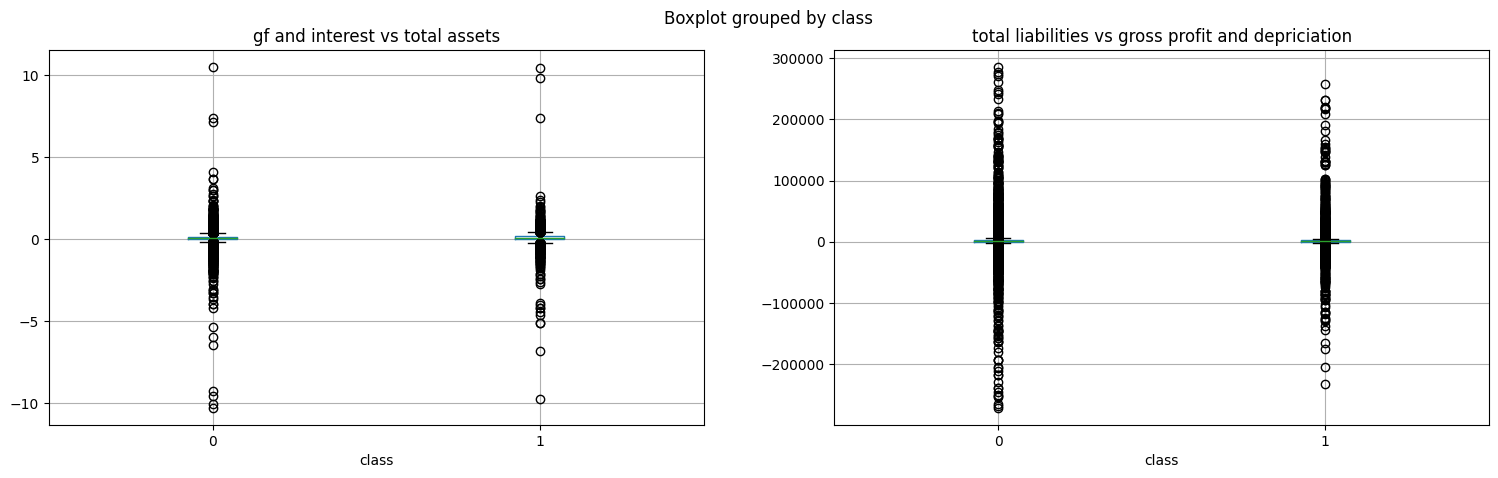

In [65]:
ContinuousColsList3 = ['gf and interest vs total assets',
       'total liabilities vs gross profit and depriciation']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList3), figsize=(18,5))
fig.subplots_adjust(hspace = 0.6,wspace=0.9)

# Creating box plots for each continuous predictor against the Target Variable "class"
for PredictorCol , i in zip(ContinuousColsList3, range(len(ContinuousColsList3))):
    profitable.boxplot(column=PredictorCol, by='class', figsize=(5,5), vert=True, ax=PlotCanvas[i])

__Observations__
  * These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.
  * Here all of the columns look almost similar in distribution hence cannot draw any insight from above plots. Need to look for statistical feature selection tests.

In [66]:
cat_cols

Index(['Industry type', 'Distance from airport', 'Employee strength',
       'MNC or not', 'Location', 'Distances from water source',
       'powered by green energy'],
      dtype='object')

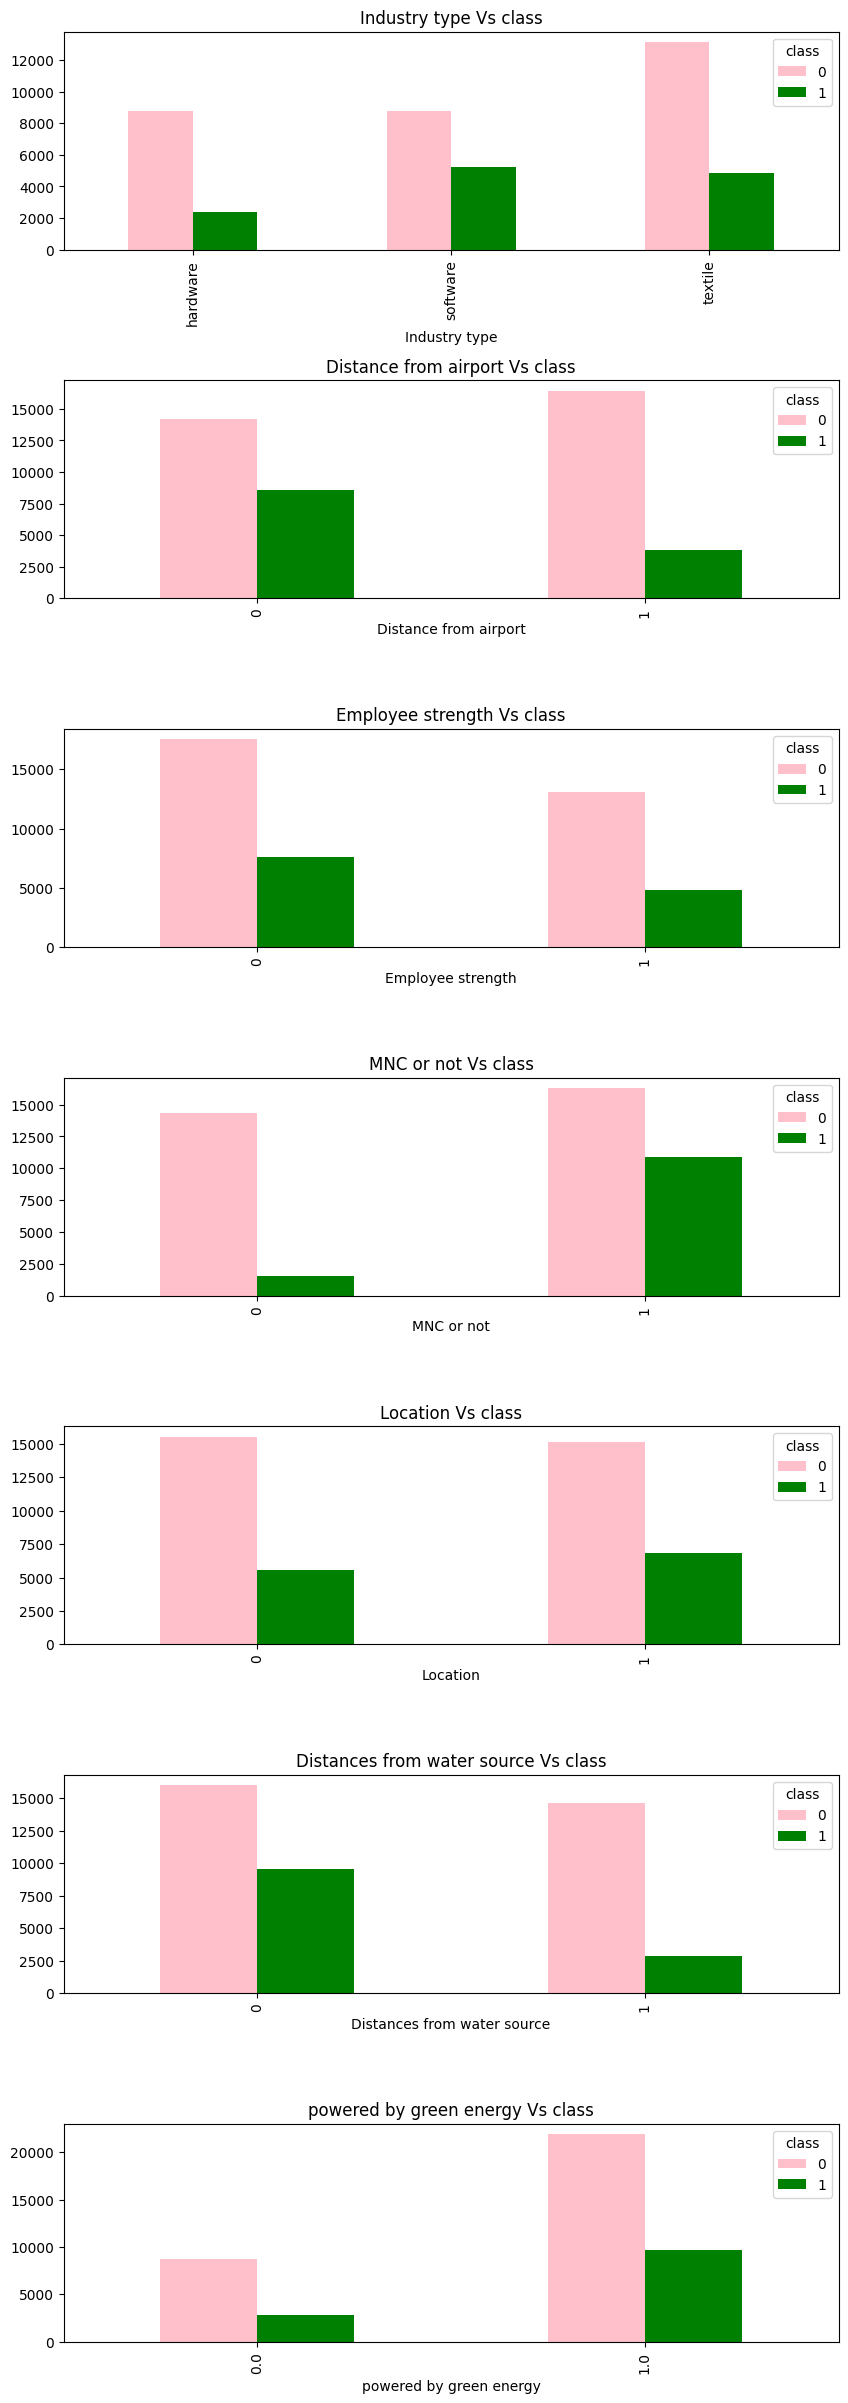

In [67]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=cat_cols

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace = 0.6,wspace=0.9)

# Creating Grouped bar plots for each categorical predictor against the Target Variable "class"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=profitable[CategoricalCol], columns=profitable['class'])
    CrossTabResult.plot.bar(color=['pink','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'class')

__Observations__

 * These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated.

 * For example Industry type vs class plot. The bars are different for each category, Hence, two columns are correlated with each other.We confirm this analysis in below section by using Chi-Square Tests.

### Feature Engineering and Feature Selection


#### Feature Creation - Altman Score
* Altman’s Z-score model combines five financial ratios to predict the probability of a company becoming insolvent in the next two years. 
* The formula takes into account  'Working Capital vs total assets','Retained earning vs total assets', 'Sales vs total assets',
  'Equity vs Total liabilities', 'gf and interest vs total assets'
* An Altman Z-score close to 1.8 suggests a company might be headed for bankruptcy, while a score closer to 3 suggests a company is in solid financial positioning.

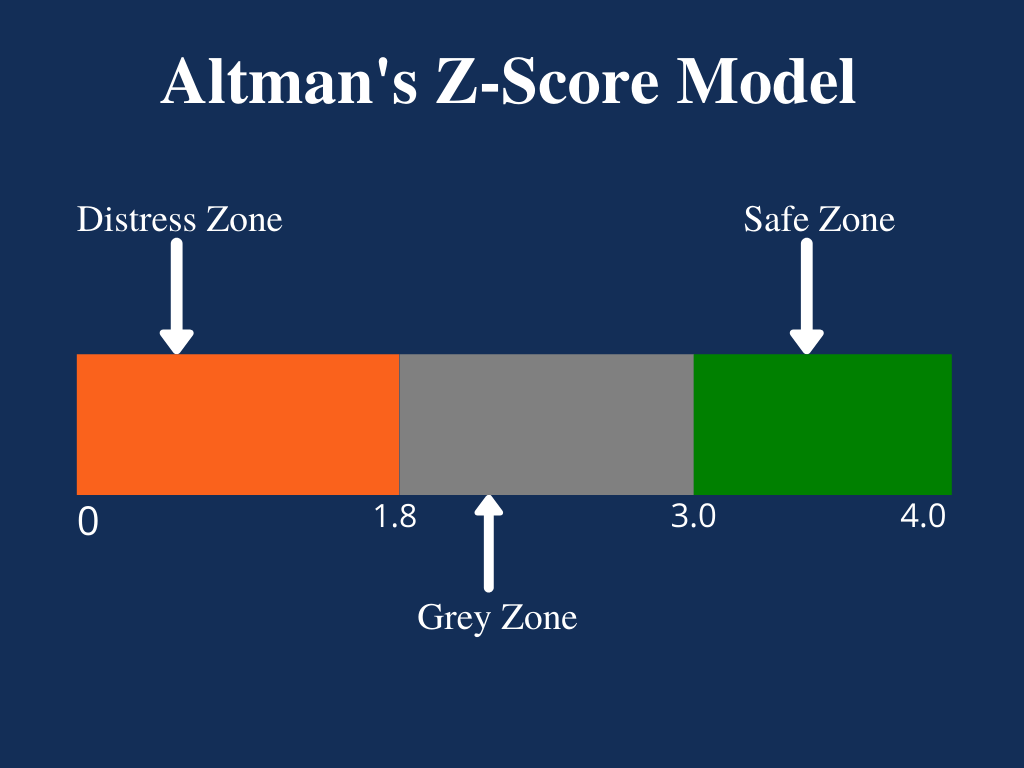

In [68]:
from IPython.display import Image
Image(filename ='altman-z-score-model.png',width=750)

In [69]:
profitable['Equity vs Total liabilities'] = profitable['Equity vs total assets']/profitable['Total liabilities vs Total Assets']

In [70]:
profitable['Equity vs Total liabilities'] = np.where(profitable['Total liabilities vs Total Assets']==0,0,profitable['Equity vs Total liabilities'])

In [71]:
A = profitable['Working Capital vs total assets'] 
B = profitable['Retained earning vs total assets'] 
C = profitable['gf and interest vs total assets'] 
D = profitable['Equity vs Total liabilities'] 
E = profitable['Sales vs total assets'] 

In [72]:
profitable['Altman score'] = 1.2*A + 1.4*B + 3.3*C + 0.6*D + 1.0*E

In [73]:
profitable.head()

,Industry type,Total liabilities vs Total Assets,Working Capital vs total assets,Current Assets vs short-term liabilities,Distance from airport,Retained earning vs total assets,Employee strength,MNC or not,Sales vs total assets,Equity vs total assets,Location,Distances from water source,powered by green energy,gf and interest vs total assets,total liabilities vs gross profit and depriciation,class,Equity vs Total liabilities,Altman score
0,software,0.37951,0.39641,2.0472,0,0.38825,0,0,1.1389,0.50494,0,0,1.0,0.249760,497.42,0,1.330505,3.780653
1,textile,0.49988,0.47225,1.9447,0,0.00000,1,0,1.6996,0.49788,0,0,1.0,0.258340,677.96,0,0.995999,3.716421
2,hardware,0.69592,0.26713,1.5548,0,0.00000,0,0,1.3090,0.30408,0,0,1.0,0.309060,794.16,0,0.436947,2.911622
3,software,0.30734,0.45879,2.4928,0,0.14988,0,0,1.0571,0.57353,0,0,1.0,0.092704,917.01,0,1.866109,3.243069
4,software,0.61323,0.22960,1.4063,1,0.18732,0,0,1.1559,0.38677,0,1,1.0,0.187320,1133.20,1,0.630710,2.690250


In [74]:
profitable.groupby('Industry type')['Altman score'].median()

Industry type
hardware    3.022255
software    3.044705
textile     3.016831
Name: Altman score, dtype: float64

In [75]:
num_cols = ['Total liabilities vs Total Assets', 'Working Capital vs total assets',
       'Current Assets vs short-term liabilities',
       'Retained earning vs total assets', 'Sales vs total assets',
       'Equity vs total assets', 'gf and interest vs total assets',
       'total liabilities vs gross profit and depriciation','Equity vs Total liabilities','Altman score']

__Statistical feature selection__

* Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable.

* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable).
* ANOVA Test result: Probability of H0 being true.

In [76]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [77]:
ContinuousVariables = num_cols
FunctionAnova(inpData=profitable, TargetVariable='class', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Total liabilities vs Total Assets is correlated with class | P-Value: 0.049794748513130024
Working Capital vs total assets is correlated with class | P-Value: 7.707187400403062e-05
Current Assets vs short-term liabilities is correlated with class | P-Value: 0.0005923248626253448
Retained earning vs total assets is correlated with class | P-Value: 2.7412556486127203e-07
Sales vs total assets is correlated with class | P-Value: 0.0032803081520043826
Equity vs total assets is correlated with class | P-Value: 0.015428108162950462
gf and interest vs total assets is correlated with class | P-Value: 1.428451779747847e-15
total liabilities vs gross profit and depriciation is NOT correlated with class | P-Value: 0.8712749612735691
Equity vs Total liabilities is NOT correlated with class | P-Value: 0.05301124765639605
Altman score is NOT correlated with class | P-Value: 0.05916097911557314


['Total liabilities vs Total Assets',
 'Working Capital vs total assets',
 'Current Assets vs short-term liabilities',
 'Retained earning vs total assets',
 'Sales vs total assets',
 'Equity vs total assets',
 'gf and interest vs total assets']

__Chi-Square test is conducted to check the correlation between two categorical variables__

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [78]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [79]:
CategoricalVariables = cat_cols

# Calling the function
FunctionChisq(inpData=profitable, 
              TargetVariable='class',
              CategoricalVariablesList= CategoricalVariables)

Industry type is correlated with class | P-Value: 7.039841364783307e-183
Distance from airport is correlated with class | P-Value: 0.0
Employee strength is correlated with class | P-Value: 9.345625125640257e-15
MNC or not is correlated with class | P-Value: 0.0
Location is correlated with class | P-Value: 1.0175041769334928e-27
Distances from water source is correlated with class | P-Value: 0.0
powered by green energy is correlated with class | P-Value: 9.215482326522116e-39


['Industry type',
 'Distance from airport',
 'Employee strength',
 'MNC or not',
 'Location',
 'Distances from water source',
 'powered by green energy']

In [80]:
# Deleting non-correlated column from data
profitable = profitable.drop(['Equity vs Total liabilities','Altman score','total liabilities vs gross profit and depriciation'],axis=1)

#### Final selected predictors :
'Industry type', 'Total liabilities vs Total Assets',
       'Working Capital vs total assets',
       'Current Assets vs short-term liabilities', 'Distance from airport',
       'Retained earning vs total assets', 'Employee strength', 'MNC or not',
       'Sales vs total assets', 'Equity vs total assets', 'Location',
       'Distances from water source', 'powered by green energy',
       'gf and interest vs total assets'

### Train-Test Split
* Target attribute description

In [81]:
profitable['class'].value_counts()

0    30653
1    12461
Name: class, dtype: int64

In [82]:
profitable['class'].value_counts(normalize=True)*100

0    71.097555
1    28.902445
Name: class, dtype: float64

#### Split the model in train and test

In [83]:
X = profitable.drop('class', axis=1)
y = profitable['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123) 

#### Target attribute description after split

In [84]:
print(pd.value_counts(y_train)/y_train.count() * 100)

print(pd.value_counts(y_test) /y_test.count() * 100)

0    70.814142
1    29.185858
Name: class, dtype: float64
0    71.758794
1    28.241206
Name: class, dtype: float64


#### Convert categorical target attribute to numeric

In [85]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [86]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [87]:
y_train

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [88]:
y_train.size

30179

In [89]:
pd.value_counts(y_train)/y_train.size * 100

0    70.814142
1    29.185858
dtype: float64

In [90]:
#checking data types
X_train.dtypes

Industry type                               category
Total liabilities vs Total Assets            float64
Working Capital vs total assets              float64
Current Assets vs short-term liabilities     float64
Distance from airport                       category
Retained earning vs total assets             float64
Employee strength                           category
MNC or not                                  category
Sales vs total assets                        float64
Equity vs total assets                       float64
Location                                    category
Distances from water source                 category
powered by green energy                     category
gf and interest vs total assets              float64
dtype: object

#### Standardize the numerical attributes

In [91]:
num_attr = X_train.select_dtypes(include=['float64', 'int64']).columns
num_attr

Index(['Total liabilities vs Total Assets', 'Working Capital vs total assets',
       'Current Assets vs short-term liabilities',
       'Retained earning vs total assets', 'Sales vs total assets',
       'Equity vs total assets', 'gf and interest vs total assets'],
      dtype='object')

#### Convert categorical attributes to numeric

In [92]:
cat_attr = X_train.select_dtypes(include=['category']).columns
cat_attr

Index(['Industry type', 'Distance from airport', 'Employee strength',
       'MNC or not', 'Location', 'Distances from water source',
       'powered by green energy'],
      dtype='object')

* Using OneHotEncoder, converting Categorical attributes to Numeric attributes

In [93]:
enc = OneHotEncoder()

enc.fit(X_train[cat_attr])

columns_ohe = list(enc.get_feature_names(cat_attr))
print(columns_ohe)

['Industry type_hardware', 'Industry type_software', 'Industry type_textile', 'Distance from airport_0', 'Distance from airport_1', 'Employee strength_0', 'Employee strength_1', 'MNC or not_0', 'MNC or not_1', 'Location_0', 'Location_1', 'Distances from water source_0', 'Distances from water source_1', 'powered by green energy_0.0', 'powered by green energy_1.0']


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [94]:
X_train_ohe =enc.transform(X_train[cat_attr])
X_test_ohe =enc.transform(X_test[cat_attr])

In [95]:
X_train_cat = pd.DataFrame(X_train_ohe.todense(), columns=columns_ohe)
X_test_cat = pd.DataFrame(X_test_ohe.todense(), columns=columns_ohe)

#### Concatenate attribute
* Standardised numeric attributes and One hot encoded categorical attributes

In [96]:
X_train_num = pd.DataFrame(X_train[num_attr],columns=num_attr)
X_test_num = pd.DataFrame(X_test[num_attr],columns=num_attr)

In [97]:
X_train_num.isnull().sum()

Total liabilities vs Total Assets           0
Working Capital vs total assets             0
Current Assets vs short-term liabilities    0
Retained earning vs total assets            0
Sales vs total assets                       0
Equity vs total assets                      0
gf and interest vs total assets             0
dtype: int64

In [98]:
X_train_cat.shape

(30179, 15)

In [99]:
X_train_con = pd.concat([X_train_num.reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test_con = pd.concat([X_test_num.reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)

In [100]:
X_train_con

,Total liabilities vs Total Assets,Working Capital vs total assets,Current Assets vs short-term liabilities,Retained earning vs total assets,Sales vs total assets,Equity vs total assets,gf and interest vs total assets,Industry type_hardware,Industry type_software,Industry type_textile,...,Employee strength_0,Employee strength_1,MNC or not_0,MNC or not_1,Location_0,Location_1,Distances from water source_0,Distances from water source_1,powered by green energy_0.0,powered by green energy_1.0
0,0.434110,-0.012130,0.97077,-0.445450,0.89561,0.565890,0.007208,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.958580,-0.235050,0.74953,-0.325670,1.00960,-0.057261,-0.033935,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.094982,0.494620,6.20750,0.000000,2.18120,0.905020,0.592110,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.204240,0.237850,2.16460,0.000000,4.89860,0.795760,0.124250,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.628040,-0.088218,0.79401,0.173600,3.30450,0.371960,0.067279,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,0.171920,0.121870,1.95650,0.418730,1.26250,0.797500,0.226950,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
30175,1.025900,0.195750,2.01000,0.000000,1.27120,-0.025882,-0.666760,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
30176,0.523440,-0.102460,0.66978,0.241330,1.09860,0.449730,0.041528,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
30177,0.859400,0.145950,1.19910,0.042677,2.21540,0.140600,-0.034003,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [101]:
X_train_con.isnull().sum()

Total liabilities vs Total Assets           0
Working Capital vs total assets             0
Current Assets vs short-term liabilities    0
Retained earning vs total assets            0
Sales vs total assets                       0
Equity vs total assets                      0
gf and interest vs total assets             0
Industry type_hardware                      0
Industry type_software                      0
Industry type_textile                       0
Distance from airport_0                     0
Distance from airport_1                     0
Employee strength_0                         0
Employee strength_1                         0
MNC or not_0                                0
MNC or not_1                                0
Location_0                                  0
Location_1                                  0
Distances from water source_0               0
Distances from water source_1               0
powered by green energy_0.0                 0
powered by green energy_1.0       

#### Defining Error Metrics

In [102]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="weighted")
    train_precision= precision_score(train_actual,train_predicted,average="weighted")
    train_f1score  = f1_score(train_actual,train_predicted,average="weighted")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="weighted")
    test_precision= precision_score(test_actual,test_predicted,average="weighted")
    test_f1score  = f1_score(test_actual,test_predicted,average="weighted")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [103]:
# Function for Classification Report

def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):
    
    print ( '''
            =========================================
                      CONFUSION MATRIX for TRAIN 
            =========================================
            '''
          )
    print(confusion_matrix(y_train, train_pred))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))
    print ( '''
            =========================================
                      CONFUSION MATRIX for TEST
            =========================================
            '''
          )
    print(confusion_matrix(y_test, test_pred))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

## Model building

#### Logistic Regression model

In [104]:
logreg = LogisticRegression()

In [105]:
logreg.fit(X_train_con, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Predict

In [106]:
train_pred = logreg.predict(X_train_con)
test_pred = logreg.predict(X_test_con)

#### Evaluate

In [107]:
classifcation_report_train_test(y_train,train_pred,y_test,test_pred)


                      CONFUSION MATRIX for TRAIN 
            
[[21297    74]
 [ 3441  5367]]

               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8609    0.9965    0.9238     21371
           1     0.9864    0.6093    0.7533      8808

    accuracy                         0.8835     30179
   macro avg     0.9237    0.8029    0.8385     30179
weighted avg     0.8975    0.8835    0.8740     30179


                      CONFUSION MATRIX for TEST
            
[[9249   33]
 [1493 2160]]

               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8610    0.9964    0.9238      9282
           1     0.9850    0.5913    0.7390      3653

    accuracy                         0.8820     12935
   macro avg     0.9230    0.7939    0.8314     12935
weighted avg     0.8960    0.8820    0.8716     12935



In [108]:
scores = get_metrics(y_train,train_pred,y_test,test_pred,"LogReg",scores)
scores

C:\Users\DELL\AppData\Local\Temp\ipykernel_10212\2360603679.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogReg,0.883528,0.883528,0.89753,0.87402,0.882026,0.882026,0.896015,0.871595


__Observations:__
* Above we can see the baseline Logistic regression model with both train and test accuracy of 88%, precision score of 89.6% and f1-score as 87% hence it is a regular fit model.

#### KNN classification

In [109]:
knn = KNeighborsClassifier(n_neighbors=5,metric="euclidean")
knn.fit(X_train_con,y_train)

KNeighborsClassifier(metric='euclidean')

In [110]:
train_pred = knn.predict(X_train_con)
test_pred = knn.predict(X_test_con)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [111]:
classifcation_report_train_test(y_train,train_pred,y_test,test_pred)


                      CONFUSION MATRIX for TRAIN 
            
[[20871   500]
 [ 2420  6388]]

               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8961    0.9766    0.9346     21371
           1     0.9274    0.7252    0.8140      8808

    accuracy                         0.9032     30179
   macro avg     0.9118    0.8509    0.8743     30179
weighted avg     0.9052    0.9032    0.8994     30179


                      CONFUSION MATRIX for TEST
            
[[8878  404]
 [1264 2389]]

               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8754    0.9565    0.9141      9282
           1     0.8554    0.6540    0.7412      3653

    accuracy                         0.8710     12935
   macro avg     0.8654    0.8052    0.8277     12935
weighted avg     0.8697    0.8710    0.8653     12935



In [112]:
scores = get_metrics(y_train,train_pred,y_test,test_pred,"KNN",scores)
scores

C:\Users\DELL\AppData\Local\Temp\ipykernel_10212\2360603679.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogReg,0.883528,0.883528,0.897530,0.874020,0.882026,0.882026,0.896015,0.871595
1,KNN,0.903244,0.903244,0.905236,0.899406,0.871048,0.871048,0.869717,0.865300


#### Observations:
* Model seems lower in performance than previous one with respectto its train and test accuracy. Also, precision is not as per the logistic regression. Hence need improvement.

#### KNN best parameters

In [113]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [114]:
parameters = {'n_neighbors':list(range(2,12))}

KNN_bestparams = HalvingGridSearchCV(KNeighborsClassifier(),
                   parameters,verbose=1, cv=5)

KNN_bestparams.fit(X=X_train_con, y=y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 3353
max_resources_: 30179
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 10
n_resources: 3353
Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

----------
iter: 1
n_candidates: 4
n_resources: 10059
Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

----------
iter: 2
n_candidates: 2
n_resources: 30177
Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

HalvingGridSearchCV(estimator=KNeighborsClassifier(),
                    param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                11]},
                    verbose=1)

In [115]:
knn_best_model = KNN_bestparams.best_estimator_
knn_best_model

KNeighborsClassifier(n_neighbors=4)

In [116]:
print (KNN_bestparams.best_score_, KNN_bestparams.best_params_) 

0.8809238617181456 {'n_neighbors': 4}


In [117]:
train_pred = knn_best_model.predict(X_train_con)
test_pred = knn_best_model.predict(X_test_con)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [118]:
classifcation_report_train_test(y_train,train_pred,y_test,test_pred)


                      CONFUSION MATRIX for TRAIN 
            
[[21187   184]
 [ 2748  6060]]

               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8852    0.9914    0.9353     21371
           1     0.9705    0.6880    0.8052      8808

    accuracy                         0.9028     30179
   macro avg     0.9279    0.8397    0.8702     30179
weighted avg     0.9101    0.9028    0.8973     30179


                      CONFUSION MATRIX for TEST
            
[[9051  231]
 [1352 2301]]

               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8700    0.9751    0.9196      9282
           1     0.9088    0.6299    0.7441      3653

    accuracy                         0.8776     12935
   macro avg     0.8894    0.8025    0.8318     12935
weighted avg     0.8810    0.8776    0.8700     12935



In [119]:
scores = get_metrics(y_train,train_pred,y_test,test_pred,"KNNbestparams",scores)
scores

C:\Users\DELL\AppData\Local\Temp\ipykernel_10212\2360603679.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogReg,0.883528,0.883528,0.897530,0.874020,0.882026,0.882026,0.896015,0.871595
1,KNN,0.903244,0.903244,0.905236,0.899406,0.871048,0.871048,0.869717,0.865300
2,KNNbestparams,0.902846,0.902846,0.910097,0.897321,0.877619,0.877619,0.880975,0.870013


__Observations:__
* After hyperparameter tuning,the KNN model got improved with a better train-test accuracy compared to earlier version. Also, both test precision and f1-score improved. Therefore it can be a better fit model.

#### Decision Trees

In [120]:
dt = DecisionTreeClassifier(max_depth=4)

In [121]:
dt.fit(X_train_con, y_train)

DecisionTreeClassifier(max_depth=4)

In [122]:
train_pred = dt.predict(X_train_con)
test_pred = dt.predict(X_test_con)

In [123]:
classifcation_report_train_test(y_train,train_pred,y_test,test_pred)


                      CONFUSION MATRIX for TRAIN 
            
[[21313    58]
 [ 3165  5643]]

               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8707    0.9973    0.9297     21371
           1     0.9898    0.6407    0.7779      8808

    accuracy                         0.8932     30179
   macro avg     0.9303    0.8190    0.8538     30179
weighted avg     0.9055    0.8932    0.8854     30179


                      CONFUSION MATRIX for TEST
            
[[9258   24]
 [1375 2278]]

               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8707    0.9974    0.9298      9282
           1     0.9896    0.6236    0.7651      3653

    accuracy                         0.8918     12935
   macro avg     0.9301    0.8105    0.8474     12935
weighted avg     0.9043    0.8918    0.8832     12935



In [124]:
scores = get_metrics(y_train,train_pred,y_test,test_pred,"DecisionTrees",scores)
scores

C:\Users\DELL\AppData\Local\Temp\ipykernel_10212\2360603679.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogReg,0.883528,0.883528,0.897530,0.874020,0.882026,0.882026,0.896015,0.871595
1,KNN,0.903244,0.903244,0.905236,0.899406,0.871048,0.871048,0.869717,0.865300
2,KNNbestparams,0.902846,0.902846,0.910097,0.897321,0.877619,0.877619,0.880975,0.870013
3,DecisionTrees,0.893204,0.893204,0.905468,0.885388,0.891844,0.891844,0.904261,0.883244


__Observations:__
* Decision tree is giving a better fitness on both train and validation data compared to KNN model.

#### Random Forest Classifier

In [125]:
clf_rf = RandomForestClassifier()

In [126]:
clf_rf.fit(X_train_con, y_train)

RandomForestClassifier()

In [127]:
train_pred = clf_rf.predict(X_train_con)
test_pred = clf_rf.predict(X_test_con)

In [128]:
classifcation_report_train_test(y_train,train_pred,y_test,test_pred)


                      CONFUSION MATRIX for TRAIN 
            
[[21371     0]
 [   11  8797]]

               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9995    1.0000    0.9997     21371
           1     1.0000    0.9988    0.9994      8808

    accuracy                         0.9996     30179
   macro avg     0.9997    0.9994    0.9996     30179
weighted avg     0.9996    0.9996    0.9996     30179


                      CONFUSION MATRIX for TEST
            
[[9066  216]
 [1253 2400]]

               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8786    0.9767    0.9251      9282
           1     0.9174    0.6570    0.7657      3653

    accuracy                         0.8864     12935
   macro avg     0.8980    0.8169    0.8454     12935
weighted avg     0.8895    0.8864    0.8800     12935



In [129]:
scores = get_metrics(y_train,train_pred,y_test,test_pred,"RandomForest",scores)
scores

C:\Users\DELL\AppData\Local\Temp\ipykernel_10212\2360603679.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogReg,0.883528,0.883528,0.897530,0.874020,0.882026,0.882026,0.896015,0.871595
1,KNN,0.903244,0.903244,0.905236,0.899406,0.871048,0.871048,0.869717,0.865300
2,KNNbestparams,0.902846,0.902846,0.910097,0.897321,0.877619,0.877619,0.880975,0.870013
3,DecisionTrees,0.893204,0.893204,0.905468,0.885388,0.891844,0.891844,0.904261,0.883244
4,RandomForest,0.999636,0.999636,0.999636,0.999635,0.886432,0.886432,0.889547,0.880043


__Observations:__
* Random forest is overfitting the prediction output hence upsampling will be done.

#### Upsampling to tackle target attribute's class imbalance

In [130]:
!pip install imblearn

In [131]:
from imblearn.over_sampling import SMOTE

In [132]:
smote = SMOTE(random_state=123)

In [133]:
X_train_sm, y_train_sm = smote.fit_resample(X_train_con, y_train)

In [134]:
clf_rf_upsample = RandomForestClassifier()

In [135]:
clf_rf_upsample.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [136]:
train_pred = clf_rf_upsample.predict(X_train_sm)
test_pred = clf_rf_upsample.predict(X_test_con)

In [137]:
classifcation_report_train_test(y_train_sm,train_pred,y_test,test_pred)


                      CONFUSION MATRIX for TRAIN 
            
[[21368     3]
 [    7 21364]]

               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     21371
           1     0.9999    0.9997    0.9998     21371

    accuracy                         0.9998     42742
   macro avg     0.9998    0.9998    0.9998     42742
weighted avg     0.9998    0.9998    0.9998     42742


                      CONFUSION MATRIX for TEST
            
[[8753  529]
 [1080 2573]]

               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8902    0.9430    0.9158      9282
           1     0.8295    0.7044    0.7618      3653

    accuracy                         0.8756     12935
   macro avg     0.8598    0.8237    0.8388     12935
weighted avg     0.8730    0.8756    0.8723     12935



In [138]:
scores = get_metrics(y_train_sm,train_pred,y_test,test_pred,"RFupsampling",scores)
scores

C:\Users\DELL\AppData\Local\Temp\ipykernel_10212\2360603679.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogReg,0.883528,0.883528,0.897530,0.874020,0.882026,0.882026,0.896015,0.871595
1,KNN,0.903244,0.903244,0.905236,0.899406,0.871048,0.871048,0.869717,0.865300
2,KNNbestparams,0.902846,0.902846,0.910097,0.897321,0.877619,0.877619,0.880975,0.870013
3,DecisionTrees,0.893204,0.893204,0.905468,0.885388,0.891844,0.891844,0.904261,0.883244
4,RandomForest,0.999636,0.999636,0.999636,0.999635,0.886432,0.886432,0.889547,0.880043
5,RFupsampling,0.999766,0.999766,0.999766,0.999766,0.875609,0.875609,0.873023,0.872328


__Observations:__

* Upsampling did not work for handling overfitting of model in Random Forest.

#### Random Forest best parameters

In [139]:
param_grid = {"n_estimators" : [50, 100,200],
              "max_depth" : [1,5,10],
              "max_features" : [3, 5],
              "min_samples_leaf" : [1, 2, 4]}

In [140]:
rfc_grid = RandomForestClassifier()

In [141]:
rfc_grid_cv = HalvingGridSearchCV(rfc_grid, param_grid, cv=2)

In [142]:
rfc_grid_cv.fit(X_train_con, y_train)

HalvingGridSearchCV(cv=2, estimator=RandomForestClassifier(),
                    param_grid={'max_depth': [1, 5, 10], 'max_features': [3, 5],
                                'min_samples_leaf': [1, 2, 4],
                                'n_estimators': [50, 100, 200]})

In [143]:
rfc_grid_best = rfc_grid_cv.best_estimator_
rfc_grid_best

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=200)

In [144]:
train_pred = rfc_grid_best.predict(X_train_con)
test_pred = rfc_grid_best.predict(X_test_con)

In [145]:
classifcation_report_train_test(y_train,train_pred,y_test,test_pred)


                      CONFUSION MATRIX for TRAIN 
            
[[21272    99]
 [ 3078  5730]]

               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8736    0.9954    0.9305     21371
           1     0.9830    0.6505    0.7829      8808

    accuracy                         0.8947     30179
   macro avg     0.9283    0.8230    0.8567     30179
weighted avg     0.9055    0.8947    0.8874     30179


                      CONFUSION MATRIX for TEST
            
[[9234   48]
 [1353 2300]]

               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8722    0.9948    0.9295      9282
           1     0.9796    0.6296    0.7665      3653

    accuracy                         0.8917     12935
   macro avg     0.9259    0.8122    0.8480     12935
weighted avg     0.9025    0.8917    0.8835     12935



In [146]:
scores = get_metrics(y_train,train_pred,y_test,test_pred,"RFbestparams",scores)
scores

C:\Users\DELL\AppData\Local\Temp\ipykernel_10212\2360603679.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogReg,0.883528,0.883528,0.897530,0.874020,0.882026,0.882026,0.896015,0.871595
1,KNN,0.903244,0.903244,0.905236,0.899406,0.871048,0.871048,0.869717,0.865300
2,KNNbestparams,0.902846,0.902846,0.910097,0.897321,0.877619,0.877619,0.880975,0.870013
3,DecisionTrees,0.893204,0.893204,0.905468,0.885388,0.891844,0.891844,0.904261,0.883244
4,RandomForest,0.999636,0.999636,0.999636,0.999635,0.886432,0.886432,0.889547,0.880043
5,RFupsampling,0.999766,0.999766,0.999766,0.999766,0.875609,0.875609,0.873023,0.872328
6,RFbestparams,0.894728,0.894728,0.905529,0.887445,0.891689,0.891689,0.902520,0.883469


In [147]:
print (rfc_grid_best)

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=200)


In [148]:
importances = rfc_grid_best.feature_importances_
indices = np.argsort(importances)
print(indices)

[12  9 13 21 20  2  5  4  0  1  7  3  6  8 17 16 19 18 11 10 14 15]


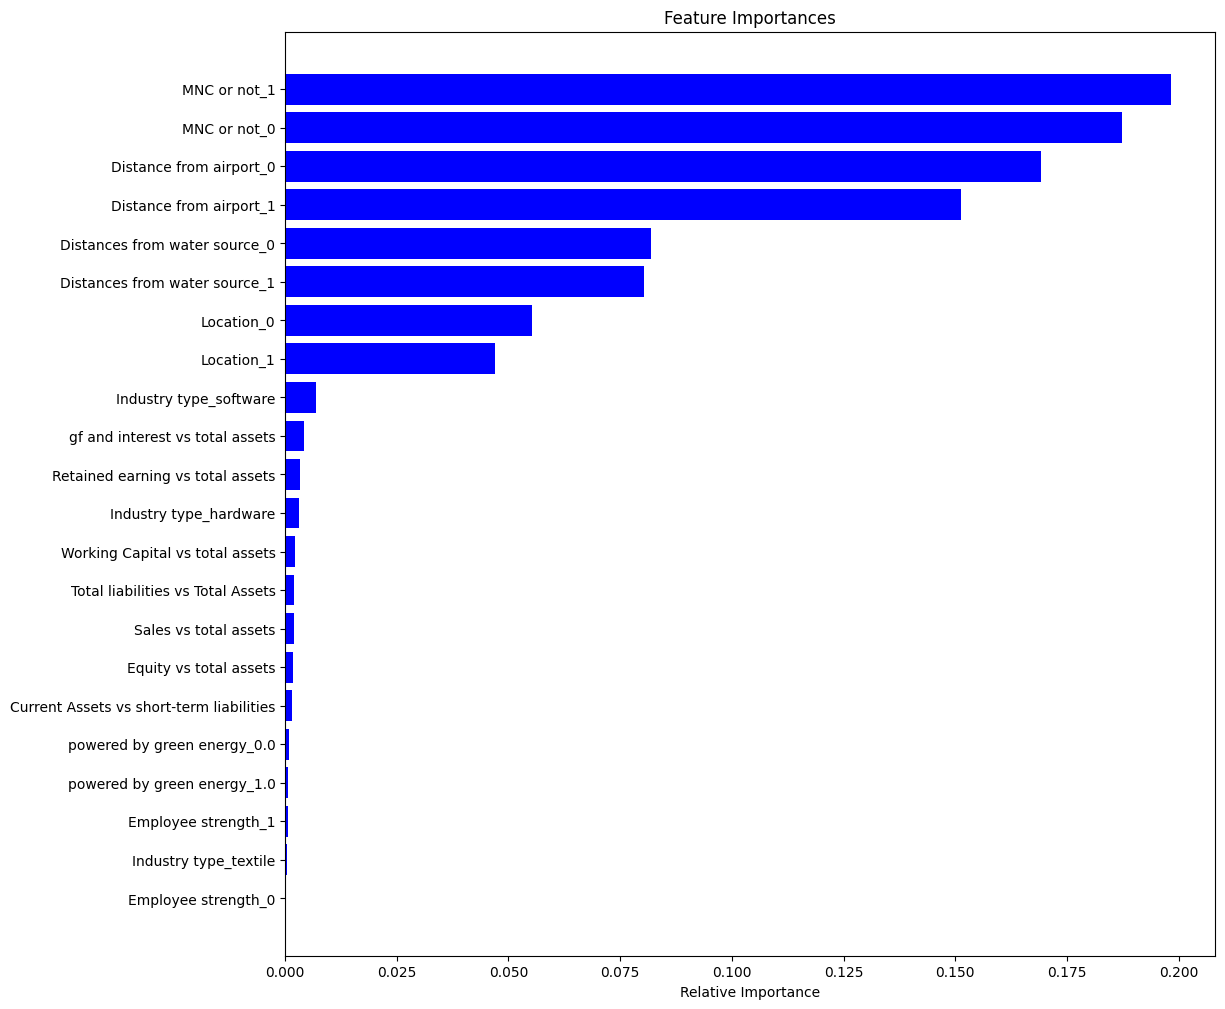

In [149]:
%matplotlib inline
features = X_train_con.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

plt.show()

__Observations:__
* Model's performance got improved after tuning hyperparameters of Random Forest in terms of all evaluation metrics.

#### AdaBoost

In [150]:
clf_adaboost =  AdaBoostClassifier(n_estimators = 500,
    learning_rate = 0.5)

In [151]:
clf_adaboost.fit(X_train_con, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=500)

In [152]:
y_pred_train = clf_adaboost.predict(X_train_con)
y_pred_test = clf_adaboost.predict(X_test_con)

print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.8841247224891481
Test Accuracy: 0.8810204870506378


In [153]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


                      CONFUSION MATRIX for TRAIN 
            
[[21272    99]
 [ 3078  5730]]

               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8643    0.9921    0.9238     21371
           1     0.9701    0.6222    0.7581      8808

    accuracy                         0.8841     30179
   macro avg     0.9172    0.8071    0.8410     30179
weighted avg     0.8952    0.8841    0.8755     30179


                      CONFUSION MATRIX for TEST
            
[[9234   48]
 [1353 2300]]

               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8629    0.9917    0.9229      9282
           1     0.9660    0.5998    0.7401      3653

    accuracy                         0.8810     12935
   macro avg     0.9145    0.7957    0.8315     12935
weighted avg     0.8921    0.8810    0.8712     12935



In [154]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Adaboost",scores)
scores

C:\Users\DELL\AppData\Local\Temp\ipykernel_10212\2360603679.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogReg,0.883528,0.883528,0.897530,0.874020,0.882026,0.882026,0.896015,0.871595
1,KNN,0.903244,0.903244,0.905236,0.899406,0.871048,0.871048,0.869717,0.865300
2,KNNbestparams,0.902846,0.902846,0.910097,0.897321,0.877619,0.877619,0.880975,0.870013
3,DecisionTrees,0.893204,0.893204,0.905468,0.885388,0.891844,0.891844,0.904261,0.883244
4,RandomForest,0.999636,0.999636,0.999636,0.999635,0.886432,0.886432,0.889547,0.880043
5,RFupsampling,0.999766,0.999766,0.999766,0.999766,0.875609,0.875609,0.873023,0.872328
6,RFbestparams,0.894728,0.894728,0.905529,0.887445,0.891689,0.891689,0.902520,0.883469
7,Adaboost,0.884125,0.884125,0.895195,0.875452,0.881020,0.881020,0.892061,0.871235


__Observations:__

* Performance is not as good as previous model but can be considered a regular fit model.

#### Adaboost with hyperparameters

In [155]:
param_grid = {'n_estimators' : [50, 100, 500],
              'learning_rate' : [0.3, 0.5, 1]}

Adaboost_param = HalvingGridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=-1)

In [156]:
%time Adaboost_param.fit(X_train_con, y_train)

Wall time: 1min 9s


HalvingGridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2)),
                    n_jobs=-1,
                    param_grid={'learning_rate': [0.3, 0.5, 1],
                                'n_estimators': [50, 100, 500]})

In [157]:
best_ada_model = Adaboost_param.best_estimator_
print (Adaboost_param.best_score_, Adaboost_param.best_params_)

0.8861603468223013 {'learning_rate': 0.3, 'n_estimators': 100}


In [158]:
best_ada_model

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.3, n_estimators=100)

In [159]:
y_pred_train = best_ada_model.predict(X_train_con)
y_pred_test = best_ada_model.predict(X_test_con)

In [160]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


                      CONFUSION MATRIX for TRAIN 
            
[[21272    99]
 [ 3078  5730]]

               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8725    0.9876    0.9265     21371
           1     0.9558    0.6499    0.7737      8808

    accuracy                         0.8890     30179
   macro avg     0.9141    0.8187    0.8501     30179
weighted avg     0.8968    0.8890    0.8819     30179


                      CONFUSION MATRIX for TEST
            
[[9234   48]
 [1353 2300]]

               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8697    0.9862    0.9243      9282
           1     0.9469    0.6244    0.7526      3653

    accuracy                         0.8840     12935
   macro avg     0.9083    0.8053    0.8384     12935
weighted avg     0.8915    0.8840    0.8758     12935



In [161]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Adaboost_BestParameters",scores)
scores

C:\Users\DELL\AppData\Local\Temp\ipykernel_10212\2360603679.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,LogReg,0.883528,0.883528,0.897530,0.874020,0.882026,0.882026,0.896015,0.871595
1,KNN,0.903244,0.903244,0.905236,0.899406,0.871048,0.871048,0.869717,0.865300
2,KNNbestparams,0.902846,0.902846,0.910097,0.897321,0.877619,0.877619,0.880975,0.870013
3,DecisionTrees,0.893204,0.893204,0.905468,0.885388,0.891844,0.891844,0.904261,0.883244
4,RandomForest,0.999636,0.999636,0.999636,0.999635,0.886432,0.886432,0.889547,0.880043
5,RFupsampling,0.999766,0.999766,0.999766,0.999766,0.875609,0.875609,0.873023,0.872328
6,RFbestparams,0.894728,0.894728,0.905529,0.887445,0.891689,0.891689,0.902520,0.883469
7,Adaboost,0.884125,0.884125,0.895195,0.875452,0.881020,0.881020,0.892061,0.871235
8,Adaboost_BestParameters,0.889029,0.889029,0.896804,0.881891,0.884036,0.884036,0.891461,0.875778


In [162]:
importances = best_ada_model.feature_importances_
indices = np.argsort(importances)
print(indices)

[13  9 12 20 21  8  7 19 11 10 17 15 16  5 18 14  0  2  4  3  1  6]


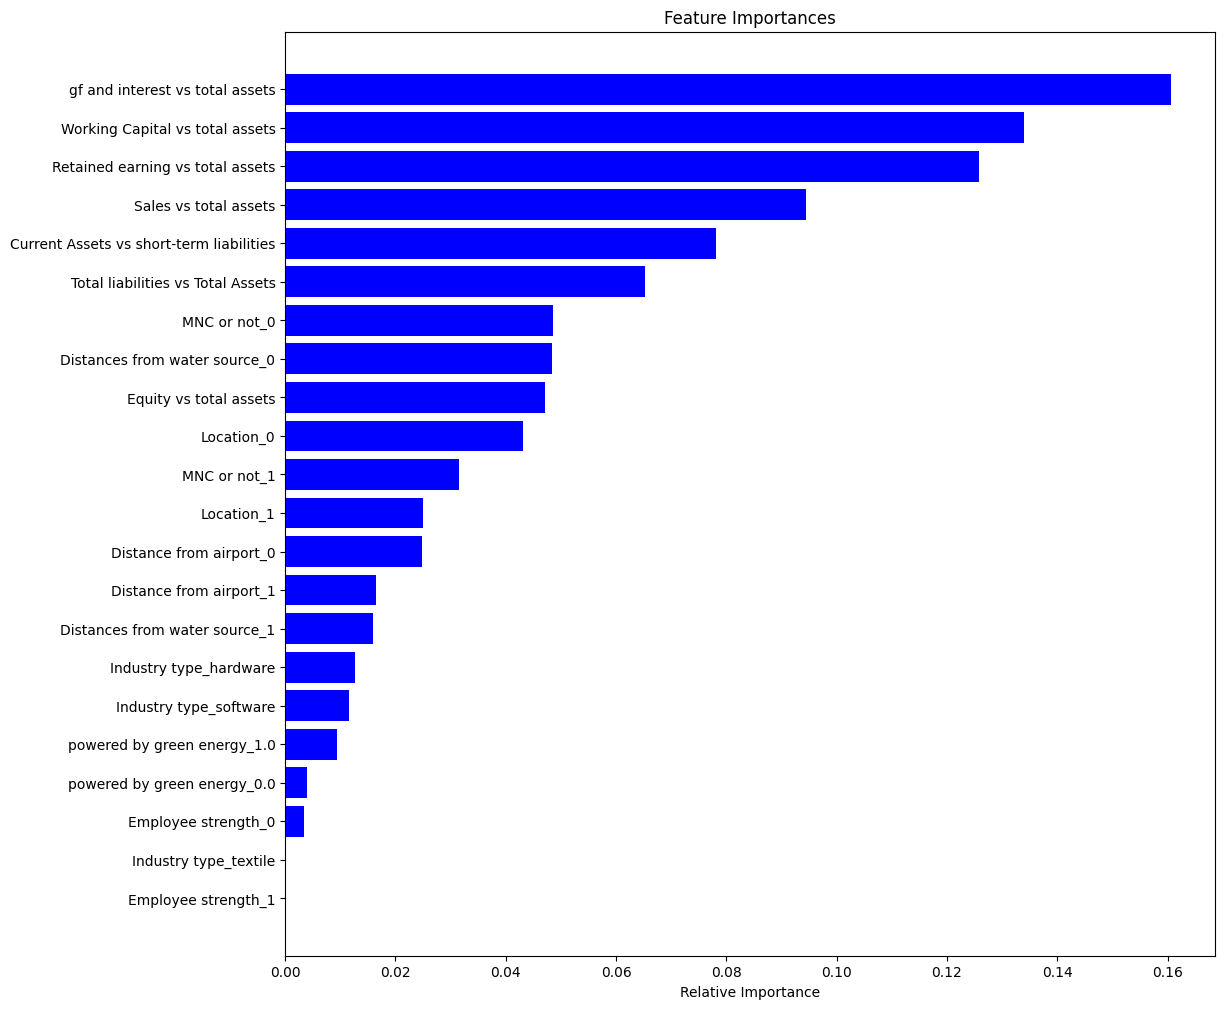

In [163]:
%matplotlib inline
features = X_train_con.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 10)
plt.xlabel('Relative Importance')

plt.show()

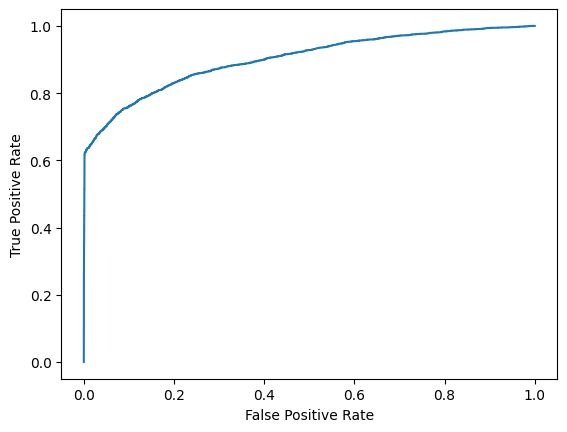

AUC= 0.902


In [164]:
# ROC-AUC curve for best fit model
from sklearn import metrics
prediction_proba = rfc_grid_best.predict_proba(X_test_con)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, prediction_proba)
auc = metrics.roc_auc_score(y_test, prediction_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("AUC=",round(auc,3))

__Observations:__
* After hyperparameter tuning Adaboost is showing better performance than its previous version. Therefore Adaboost and Decision tree are successors of Random Forest and can also be under consideration for accurate prediction.
* From above ROC-AUC curve it can be inferred that, this predictive model(Random Forest) is a pretty good performer and able to distinguish between True positive and Fall positives efficiently.